In [1]:
import sys
print(sys.executable)

c:\repos\gpt-2\.venv\Scripts\python.exe


In [2]:
from transformers import GPT2LMHeadModel

c:\repos\gpt-2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M

sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_hf["transformer.wte.weight"].view(-1)[:20]

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365])

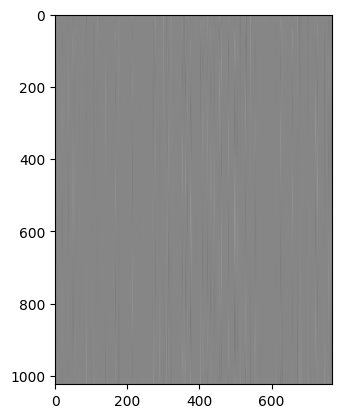

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

plt.show()

This is visualizing the positional embeddings of GPT-2 as a grayscale heatmap.

What you're seeing:
transformer.wpe.weight has shape [1024, 768]
Rows (1024): Each row represents a position in the sequence (0 to 1023)
Columns (768): Each column is one dimension of the embedding vector
What it means:
Each row is the learned embedding for a specific position in the input sequence
The grayscale intensity shows the value at each position/dimension
Patterns you might notice:
Vertical stripes = certain embedding dimensions have consistent values across positions
Horizontal gradients = embeddings change smoothly as position increases
The model learned these patterns during training to encode "where" each token is in the sequence
Key insight:
Unlike sinusoidal positional encodings (fixed mathematical patterns), GPT-2 uses learned positional embeddings. The visualization shows what the model discovered works best for understanding token positions during pre-training.

This is why nearby positions often have similar embeddings (smooth gradients) — the model learned that adjacent tokens should have related positional information

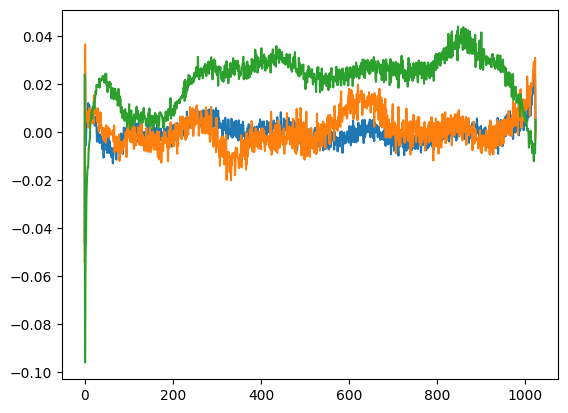

In [6]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

This plots 3 specific embedding dimensions across all 1024 positions.

What each line shows:
Line	Code	Meaning
Blue	[:,150]	Dimension 150's value at every position (0–1023)
Orange	[:,200]	Dimension 200's value at every position
Green	[:,250]	Dimension 250's value at every position
What you're seeing:
X-axis: Position in sequence (0 to 1023)
Y-axis: Learned embedding value for that dimension
Why it's interesting:
Each dimension captures a different positional pattern

Some dimensions might show:

Wave-like patterns (similar to sinusoidal encodings)
Linear trends (increasing/decreasing with position)
Periodic oscillations (repeating every N positions)
The model learned these patterns to encode positional information in a way that helps it understand token order

Comparison to the heatmap:
The previous imshow showed the entire [1024, 768] matrix. This plot takes 3 vertical slices (columns 150, 200, 250) from that heatmap and displays them as line graphs — making it easier to see how those specific dimensions vary across positions.

- in gpt3 it is initialized with a regular sinusoidal frequency, in attention is all you need
- in gpt2 just parameters trained from scratch



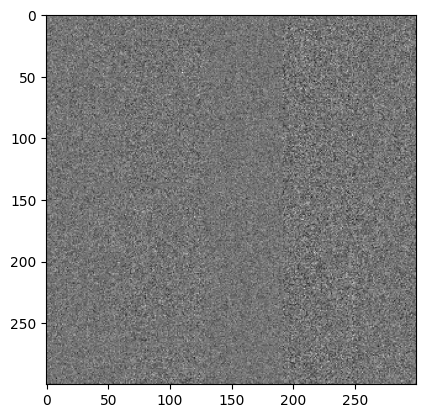

In [7]:
plt.imshow(sd_hf["transformer.h.0.attn.c_attn.weight"][:300, :300], cmap="gray")

In [8]:
from transformers import pipeline, set_seed 
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hellom I am a language model", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hellom I am a language model for the Internet that is able to help us to communicate through the Internet and it is not going to stop us from doing so.\n\nKurt Vonnegut, a writer and journalist, once wrote, "There is no such thing as a human being who is not an Internet user." He wrote, "I am a machine, but it is not a machine to be created."\n\nThere are two types of computers right now. The Internet.\n\nThe Internet is the most recent and powerful tool for people to communicate, communicate, and move around. It has the power to improve the lives of millions of people. It is the most powerful technology available. It is the most technologically advanced.\n\nThe Internet is not a tool for the Internet to change how we live and work.\n\nThe Internet is not a tool for anyone to manipulate and manipulate. It is a tool for the Internet to help us grow and grow for years to come. It is a tool for the Internet to help us to live in a world that works for everyone.\n\nThe

- we will write out owen gpt model, in parralel in train gpt2. 124m into the class we are developing then set weights, then initialize from scratch and train ourselfs on documents and see what happens

layer norm change and added layer norm added at the end before final classifier.. 


In [9]:
# let's instead sample manually
import torch
from torch.nn import functional as F

model = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
model.eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"
tokens = torch.tensor(tokens, dtype=torch.long) # (8,)
tokens = tokens.unsqueeze(0).repeat(5, 1) # (5, 8)
x = tokens.to(device)

# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # select a token from the top-k probabilities
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text
import tiktoken
enc = tiktoken.get_encoding('gpt2')
for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

> Hello, I'm a language model, not a program.

So this morning I started studying for the interview in the lab. This was not
> Hello, I'm a language model, and one of the main things that bothers me when they create languages is how easy it becomes to create something that
> Hello, I'm a language model, and I wrote it off on the grounds that a language model would make me more fluent. But I'm not
> Hello, I'm a language model, I really like languages. I like languages because like, they're good. And the way we talk about languages
> Hello, I'm a language model, a language model I'm using for data modelling. All I did was test the results and then I wrote some


In [10]:
(sd_hf["lm_head.weight"] == sd_hf["transformer.wte.weight"]).all()
# Returns: True

tensor(True)

When loading gpt from hugging face:   

(.venv) PS C:\repos\gpt-2> python .\train_gpt2.py
using device: cuda
Loading pretrained model from huggingface transformers: %s gpt2
> Hello, I'm a language model, not a program.

So this morning I started studying for the interview in the lab. This was not
> Hello, I'm a language model, and one of the main things that bothers me when they create languages is how easy it becomes to create something that
> Hello, I'm a language model, and I wrote it off on the grounds that a language model would make me more fluent. But I'm not
> Hello, I'm a language model, I really like languages. I like languages because like, they're good. And the way we talk about languages
> Hello, I'm a language model, a language model I'm using for data modelling. All I did was test the results and then I wrote some

When loading gpt from initialized model:   

(.venv) PS C:\repos\gpt-2> python .\train_gpt2.py: (.venv) PS C:\repos\gpt-2> python .\train_gpt2.py
using device: cuda
> Hello, I'm a language model, Mid hinder markup recruits SpectreTax stacks shouldn downloadedDaddy remark securely declinehelial�ados boostingtrade NoctOUN Happy depicts
> Hello, I'm a language model, stembu pe Agu Lum Sort wishes immobilRepublican 1956making Wonussie denial Bootruns drinkanda Giulianiophysical usheredread
> Hello, I'm a language model,aba Graphics Bry Brexit sensit startermodelchairs 457Status� delivers Jritz skirtPrep solvent boltedheyAW 426 credible
> Hello, I'm a language model,cutting Nissan Nicaragua pessimisticpecotaur apprentice lose snowy chunkgewater workaround Vital wise characteristic achievable fastball chaos Ferdinandarettesournals weap
> Hello, I'm a language model, wh Breitbart manipulation MimTipsochemical 426orting 318stars descendEye circadianentsclassifiedllor acclaimresultsieri appoint LOTertation 

In [11]:
# tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r') as f:
    text = f.read()
data = text[:1000] # first 1,000 characters
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [12]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [13]:

# load tiny shakespeare dataset
with open('input.txt', 'r') as f:
    text = f.read()
text = text[:1000]
tokens = enc.encode(text)
buf = torch.tensor(tokens[:24])
x = buf.view(4, 6)
print(x)


tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])


In [14]:
import torch
buf = torch.tensor(tokens[:24 + 1])
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(x)
print(y) # see labels in y at the same poisiton

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [15]:
print(sd_hf["lm_head.weight"].shape)
print(sd_hf["transformer.wte.weight"].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [16]:
x = torch.zeros(768)
n = 100
for i in range(n):
    x += torch.randn(768)

print(x.std())

tensor(9.8504)


In [17]:
x = torch.zeros(768)
n = 100
for i in range(n):
    x += n**-0.5 *torch.randn(768)

print(x.std())

tensor(1.0324)


## Gradient Accumulation: Why We Scale Loss

**The Problem**: We want to train with large batch sizes (e.g., 524K tokens) but can't fit them in GPU memory.

**The Solution**: Process smaller "micro-batches" and accumulate gradients before updating weights.

**The Catch**: PyTorch's `backward()` **adds** gradients to `.grad` by default. This means:
- Single batch of 4 samples → loss = `MEAN` of 4 losses → gradients are correctly normalized
- 4 micro-batches of 1 sample each → loss = `SUM` of 4 losses → gradients are 4x too large!

**The Fix**: Divide loss by `grad_accum_steps` before calling `backward()`.

The cells below demonstrate this with a simple MLP:
1. **Cell 1**: Standard batch of 4 → MSE divides by 4 automatically (reduction='mean')
2. **Cell 2**: 4 micro-batches of 1 → gradients accumulate as SUM, 4x larger!

Compare the printed gradients - they should differ by a factor of 4.

In [18]:
import torch

# super simple little MLP
net = torch.nn.Sequential(
    torch.nn.Linear(16, 32),
    torch.nn.GELU(),
    torch.nn.Linear(32, 1)
)

torch.random.manual_seed(42)
x = torch.randn(4, 16)
y = torch.randn(4, 1)
net.zero_grad()
yhat = net(x)
loss = torch.nn.functional.mse_loss(yhat, y)
loss.backward()
print(net[0].weight.grad.view(-1)[:10])

# the loss objective here is (due to reduction='mean')
# L = 1/4 * [
#         (y[0] - yhat[0])**2 +
#         (y[1] - yhat[1])**2 +
#         (y[2] - yhat[2])**2 +
#         (y[3] - yhat[3])**2
#     ]
#
# NOTE: 1/4!

tensor([ 0.0581,  0.0379,  0.0052, -0.0604, -0.0005, -0.0092,  0.0060,  0.0362,
         0.0714, -0.0292])


In [19]:
# now let's do it with grad_accum_steps of 4, and B=1
# the loss objective here is different because
# accumulation in gradient <---> SUM in loss
# i.e. we instead get:
# L0 = 1/4(y[0] - yhat[0])**2
# L1 = 1/4(y[1] - yhat[1])**2
# L2 = 1/4(y[2] - yhat[2])**2
# L3 = 1/4(y[3] - yhat[3])**2
# L = L0 + L1 + L2 + L3
# NOTE: the "normalizer" of 1/4 is lost
net.zero_grad()
for i in range(4):
    yhat = net(x[i])
    loss = torch.nn.functional.mse_loss(yhat, y[i])
    loss = loss / 4
    loss.backward()
print(net[0].weight.grad.view(-1)[:10])

tensor([ 0.0581,  0.0379,  0.0052, -0.0604, -0.0005, -0.0092,  0.0060,  0.0362,
         0.0714, -0.0292])


## Training Results

Parse and visualize the training log file to see loss curves and HellaSwag accuracy.

In [ ]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

# Baseline loss for OpenAI GPT-2 checkpoint
loss_baseline = {
    "124M": 3.2924,
}[sz]

# HellaSwag baseline for GPT-2
hella2_baseline = {  # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]

# HellaSwag baseline for GPT-3
hella3_baseline = {  # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file - only when training is done, wait on fnie web, 
# then add compile and remove the val loss check optionally 
# can keep the compile and run the val loss
# you can also run without dll
with open("log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train, val, hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

# Panel 1: Losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"]  # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"]  # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(0.0, 4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"]  # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'log/log.txt'